In [1]:
# Load libraries
import numpy
import pandas as pd
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [2]:
# Load dataset
filename = 'Datosgeneracion.xlsx'
dataset = pd.read_excel(filename)

In [3]:
# shape
print('shape')
print(dataset.shape)

shape
(13087, 10)


In [4]:
# types
print('types')
print(dataset.dtypes)

types
Vel_V       float64
Dir_V         int64
Hum         float64
T           float64
Año           int64
Est           int64
Mes           int64
Dia           int64
Hora          int64
Gen_real    float64
dtype: object


In [5]:
# head
print('head')
print(dataset.head(20))

head
    Vel_V  Dir_V   Hum     T   Año  Est  Mes  Dia  Hora  Gen_real
0    4.75     22  59.0  14.5  2014    1    1    1     0     123.0
1    4.27     23  61.0  13.9  2014    1    1    1     1     161.0
2    3.82     20  57.0  13.1  2014    1    1    1     2     251.0
3    3.69     11  52.0  13.1  2014    1    1    1     3     179.0
4    3.90     11  54.0  12.9  2014    1    1    1     4     109.0
5    4.29     13  64.0  13.0  2014    1    1    1     5      90.0
6    4.24     14  70.0  12.8  2014    1    1    1     6     144.0
7    4.31     13  75.0  12.8  2014    1    1    1     7     187.0
8    4.04      9  75.0  12.6  2014    1    1    1     8     195.0
9    3.48     90  64.0  14.3  2014    1    1    1     9      47.0
10   4.67     30  74.0  16.8  2014    1    1    1    10      50.0
11   4.04     47  69.0  17.6  2014    1    1    1    11     204.0
12   4.98     66  70.0  17.9  2014    1    1    1    12     436.0
13   5.59     70  71.0  17.9  2014    1    1    1    13     471.0
14   

In [6]:
# descriptions
print('descriptions')
set_option('precision', 1)
print(dataset.describe())

descriptions
         Vel_V    Dir_V      Hum        T      Año      Est      Mes      Dia  \
count  1.3e+04  13087.0  13087.0  13087.0  13087.0  13087.0  13087.0  13087.0   
mean   6.8e+00     88.8     71.5     19.4   2014.7      2.3      5.9     15.4   
std    3.8e+00     85.3     13.5      3.4      0.7      1.1      3.6      8.9   
min    7.0e-02      1.0      9.0     10.8   2014.0      1.0      1.0      1.0   
25%    3.6e+00     40.0     64.0     16.9   2014.0      1.0      3.0      8.0   
50%    6.8e+00     49.0     73.0     19.1   2015.0      2.0      6.0     15.0   
75%    9.6e+00     85.0     81.0     21.9   2015.0      3.0      9.0     23.0   
max    2.0e+01    357.0     99.0     33.6   2016.0      4.0     12.0     31.0   

          Hora  Gen_real  
count  13087.0   13087.0  
mean      12.1    1436.9  
std        6.9    1301.3  
min        0.0       0.0  
25%        6.0     193.0  
50%       13.0    1109.0  
75%       18.0    2569.0  
max       23.0    4864.0  


In [7]:
# correlation
print('correlation')
set_option('precision', 2)
print(dataset.corr(method='pearson'))

correlation
          Vel_V     Dir_V   Hum     T       Año   Est       Mes       Dia  \
Vel_V      1.00 -5.14e-01 -0.39  0.22  6.94e-02 -0.14 -1.34e-01  1.01e-01   
Dir_V     -0.51  1.00e+00  0.19 -0.11 -1.06e-01  0.12  6.32e-02  4.94e-03   
Hum       -0.39  1.92e-01  1.00 -0.40 -4.89e-02  0.10 -6.22e-02 -2.04e-02   
T          0.22 -1.09e-01 -0.40  1.00 -9.50e-02  0.62  4.84e-01 -3.00e-02   
Año        0.07 -1.06e-01 -0.05 -0.09  1.00e+00 -0.18 -2.93e-01 -2.59e-02   
Est       -0.14  1.17e-01  0.10  0.62 -1.85e-01  1.00  5.78e-01 -2.14e-02   
Mes       -0.13  6.32e-02 -0.06  0.48 -2.93e-01  0.58  1.00e+00  6.37e-03   
Dia        0.10  4.94e-03 -0.02 -0.03 -2.59e-02 -0.02  6.37e-03  1.00e+00   
Hora       0.12 -1.18e-01 -0.09  0.23 -5.85e-03  0.02  3.19e-03  1.28e-02   
Gen_real   0.80 -3.98e-01 -0.33  0.20  5.16e-02 -0.13 -1.50e-01  1.03e-01   

              Hora  Gen_real  
Vel_V     1.23e-01      0.80  
Dir_V    -1.18e-01     -0.40  
Hum      -9.04e-02     -0.33  
T         2.25e-

histograms


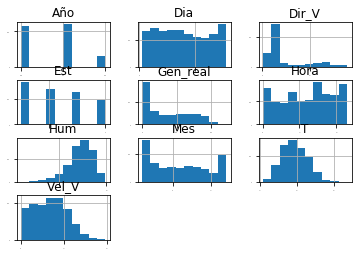

In [8]:
#Visualization data

# histograms
print('histograms')
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

density


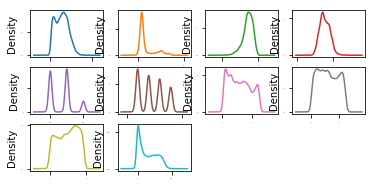

In [9]:
# density
print('density')
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
pyplot.show()

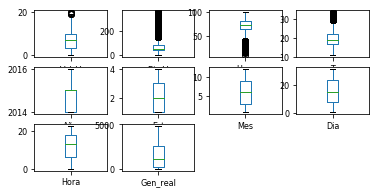

In [10]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()

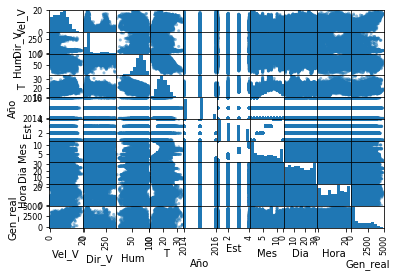

In [11]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

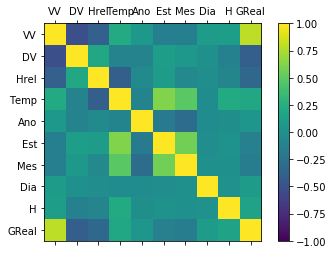

In [12]:
# correlation matrix
names = ['VV', 'DV', 'Hrel', 'Temp', 'Ano', 'Est', 'Mes', 'Dia', 'H', 'GReal']
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [13]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:8]
Y = array[:,9]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [14]:
# Test options and evaluation metric
num_folds = 10
seed = 7

#scoring = 'neg_mean_squared_error'
scoring = 'r2'

# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor()))

In [15]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s R^2: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR R^2: 0.647 (0.022)
LASSO R^2: 0.647 (0.022)
EN R^2: 0.646 (0.022)
KNN R^2: 0.667 (0.031)
CART R^2: 0.536 (0.021)
SVR R^2: -0.061 (0.020)
MLP R^2: 0.657 (0.023)


In [16]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledMLP', Pipeline([('Scaler', StandardScaler()),('MLP', MLPRegressor(max_iter=2000))])))

results = []
names = ['LR','LASSO','EN','KNN','CART','SVR','MLP']
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s R^2: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR R^2: 0.647 (0.022)
ScaledLASSO R^2: 0.647 (0.022)
ScaledEN R^2: 0.580 (0.018)
ScaledKNN R^2: 0.776 (0.022)
ScaledCART R^2: 0.529 (0.023)
ScaledSVR R^2: 0.317 (0.015)
ScaledMLP R^2: 0.708 (0.024)


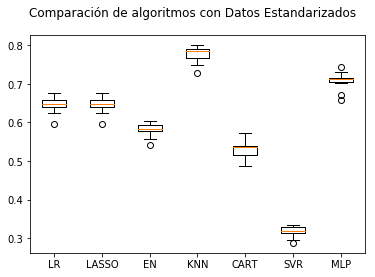

In [17]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Comparación de algoritmos con Datos Estandarizados')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [18]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.776110 using {'n_neighbors': 5}
0.708767 (0.032005) with: {'n_neighbors': 1}
0.774618 (0.024086) with: {'n_neighbors': 3}
0.776110 (0.021747) with: {'n_neighbors': 5}
0.768782 (0.020683) with: {'n_neighbors': 7}
0.762691 (0.020879) with: {'n_neighbors': 9}
0.757427 (0.020880) with: {'n_neighbors': 11}
0.753129 (0.021292) with: {'n_neighbors': 13}
0.750113 (0.021786) with: {'n_neighbors': 15}
0.746876 (0.020717) with: {'n_neighbors': 17}
0.743944 (0.022265) with: {'n_neighbors': 19}
0.741102 (0.023158) with: {'n_neighbors': 21}


In [19]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsRegressor(n_neighbors=5)
model.fit(rescaledX, Y_train)

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(r2_score(Y_validation, predictions))
print(mean_squared_error(Y_validation, predictions))
print(median_absolute_error(Y_validation, predictions))

0.786135618645
357080.785138
265.2
